<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/svcpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Predict Loan Eligibility for Dream Housing Finance company

In [45]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [46]:
#load test data
test_data=pd.read_csv('/content/test_lAUu6dG.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [47]:
# load the train dataset
train_data=pd.read_csv('/content/train_ctrUa4K.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
#drop the loan_ID column
train_data=train_data.drop('Loan_ID',axis=1)  # train dataset
test_data=test_data.drop('Loan_ID',axis=1)  # test dataset



In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [50]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Missing values**

In [51]:
# checking missing values - train dataset and test dataset
print("train dataset missing values")
train_data.isna().sum()



train dataset missing values


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
print("test dataset missing values")
test_data.isna().sum()

test dataset missing values


Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

array([[<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

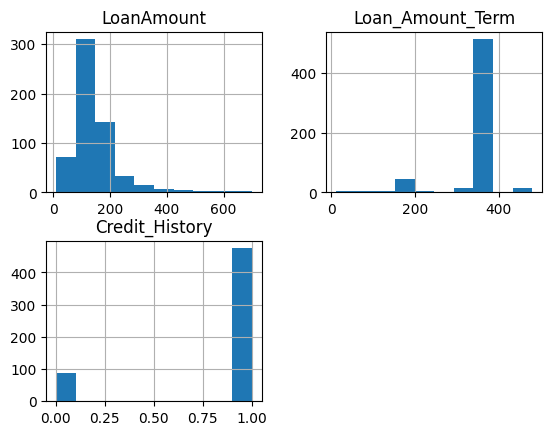

In [53]:
# hist of 'LoanAmount','Loan_Amount_Term', and 'Credit_History' columns
train_data[['LoanAmount','Loan_Amount_Term','Credit_History']].hist()

the data has missing values.
we can fill missing values in the categorical column by its respective mode values.
we fill missing values in the numerical column by appropriate measures.

In [54]:
# fill missing values -train dataset

# fill missing values - categorical column
for i in train_data.select_dtypes('object'):
  train_data[i].fillna(train_data[i].mode()[0],inplace=True)

#fill missing values - numerical  column
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True) # since 'LoanAmount' is skewed
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True) # since 'Loan_Amount_Term' column is a discrete value
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True) # since 'Credit_History' column has only values 0 and 1


# fill missing values -test dataset'

# fill missing values - categorical column
for i in test_data.select_dtypes('object'):
  test_data[i].fillna(test_data[i].mode()[0],inplace=True)

#fill missing values - numerical  column
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace=True) # since 'LoanAmount' is skewed
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True) # since 'Loan_Amount_Term' column is a discrete value
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True) # since 'Credit_History' column has only values 0 and 1


In [55]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='count', ylabel='Education'>

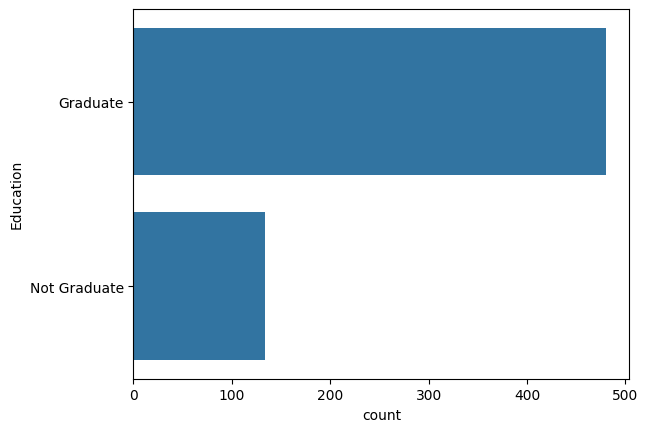

In [56]:
# distribution of the education colummn - count plot
sns.countplot(train_data['Education'])

<Axes: xlabel='count', ylabel='Self_Employed'>

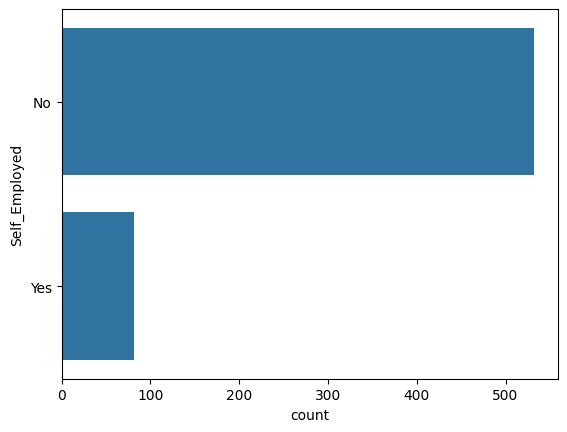

In [57]:
# distribution of the education colummn - count plot
sns.countplot(train_data['Self_Employed'])

Text(0, 0.5, 'Loan Status ')

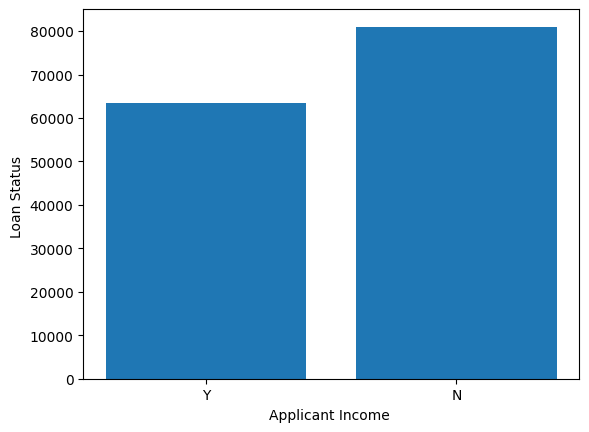

In [58]:
plt.bar(train_data['Loan_Status'],train_data['ApplicantIncome'])
plt.xlabel('Applicant Income ')
plt.ylabel('Loan Status ')

Text(0, 0.5, 'Loan Amount ')

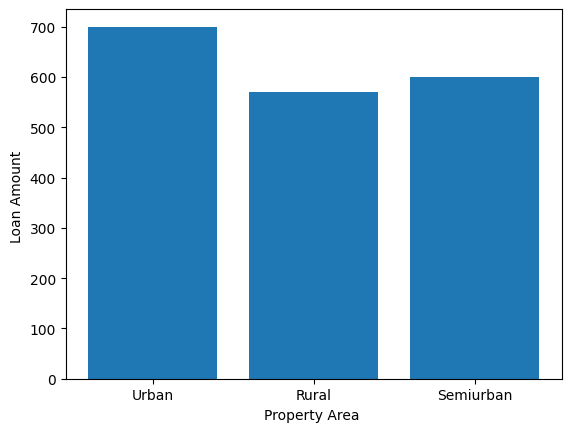

In [59]:
plt.bar(train_data['Property_Area'],train_data['LoanAmount'])
plt.xlabel('Property Area ')
plt.ylabel('Loan Amount ')


**Outlier**

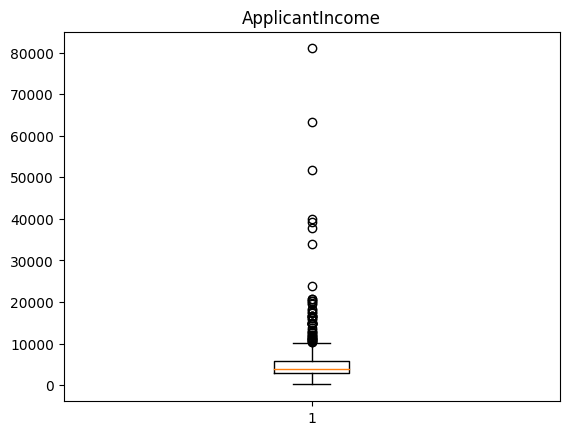

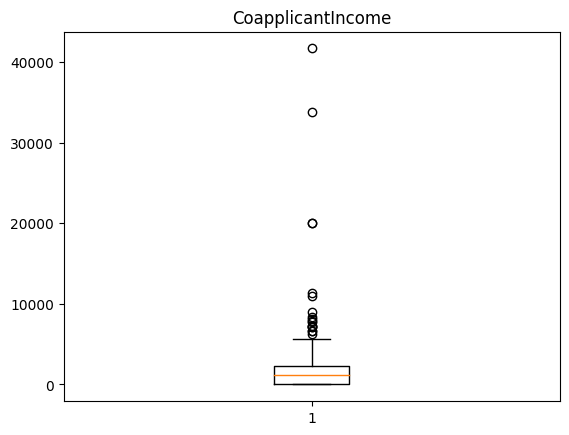

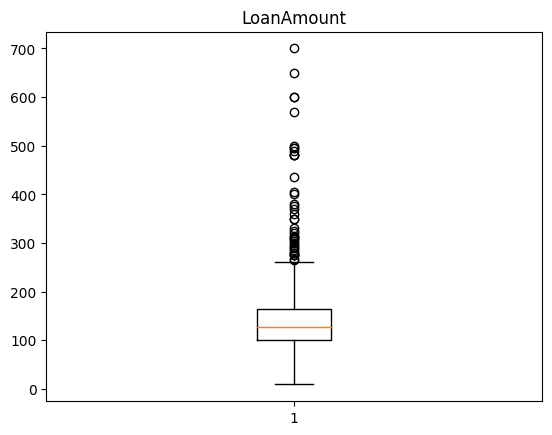

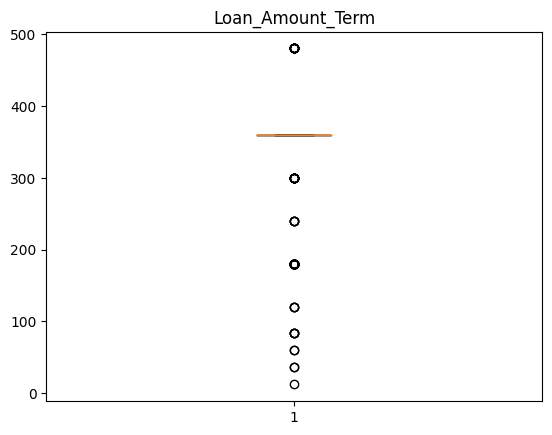

In [60]:
# box plot train dataset
for i in train_data[['ApplicantIncome','CoapplicantIncome' ,'LoanAmount','Loan_Amount_Term']]:
  plt.figure()
  plt.boxplot(train_data[i])  # BOXPLOT
  plt.title(i);

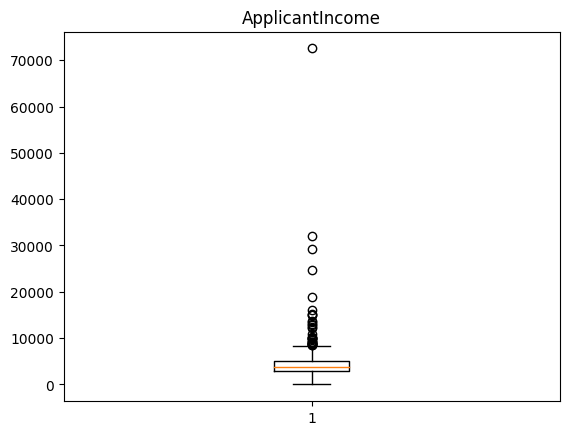

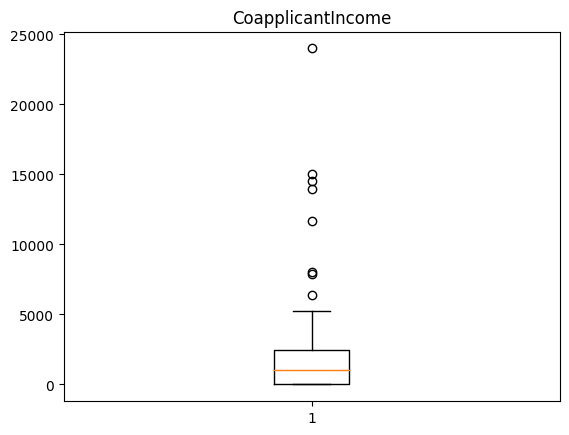

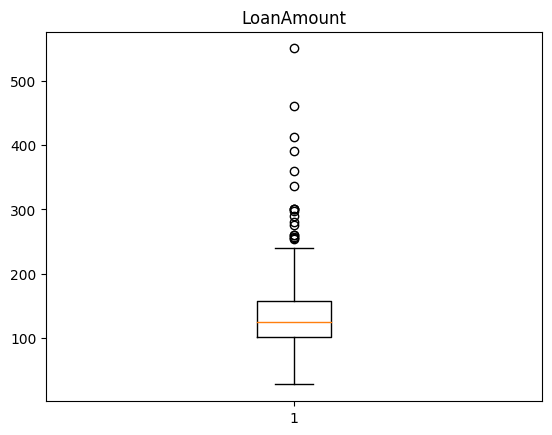

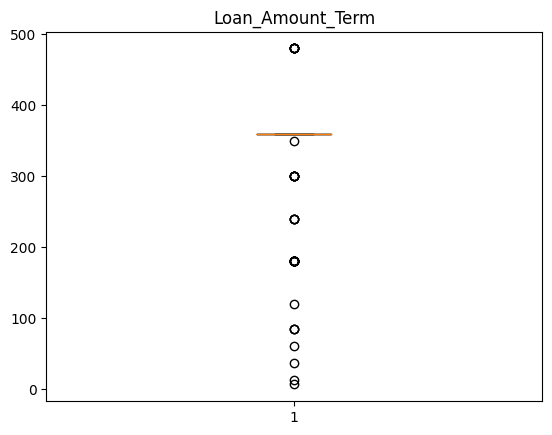

In [61]:
# box plot test dataset
for i in train_data[['ApplicantIncome','CoapplicantIncome' ,'LoanAmount','Loan_Amount_Term']]:
  plt.figure()
  plt.boxplot(test_data[i])  # BOXPLOT
  plt.title(i);

In [62]:
print('outlier handling - train dataset')
for i in train_data[['ApplicantIncome','CoapplicantIncome' ,'LoanAmount','Loan_Amount_Term']]:
  print(i)
  Q1 = np.percentile(train_data[i],25,method='midpoint')
  Q2 = np.percentile(train_data[i],50,method='midpoint')
  Q3 = np.percentile(train_data[i],75,method='midpoint')
  IQR =Q3 - Q1

  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR

  #Finding outliers
  outliers =[]

  for x in train_data[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)


  print('outliers : ',outliers)
  # upper values and lower values are replaced by upper limit and lower limit (respectively)by using clip function
  train_data[i] = train_data[i].clip(lower=low_lim ,upper=up_lim)
  print('#----------------------------------------------#')




outlier handling - train dataset
ApplicantIncome
Q1 is:  2879.0
Q2 is:  3812.5
Q3 is:  5790.0
IQR = 2911.0
outliers :  [12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]
#----------------------------------------------#
CoapplicantIncome
Q1 is:  0.0
Q2 is:  1188.5
Q3 is:  2292.5
IQR = 2292.5
outliers :  [10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]
#----------------------------------------------#
LoanAmount
Q1 is:  100.5
Q2 is:  128.0
Q3 is:  164.5
IQR = 64.0
outliers :  [267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 

In [63]:

print('outlier handling - test dataset')
for i in test_data[['ApplicantIncome','CoapplicantIncome' ,'LoanAmount','Loan_Amount_Term']]:
  print(i)
  Q1 = np.percentile(test_data[i],25,method='midpoint')
  Q2 = np.percentile(test_data[i],50,method='midpoint')
  Q3 = np.percentile(test_data[i],75,method='midpoint')
  IQR =Q3 - Q1

  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR

  #Finding outliers
  outliers =[]

  for x in test_data[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)


  print('outliers : ',outliers)
  # upper values and lower values are replaced by upper limit and lower limit (respectively)by using clip function
  test_data[i] = test_data[i].clip(lower=low_lim ,upper=up_lim)
  print('#----------------------------------------------#')


outlier handling - test dataset
ApplicantIncome
Q1 is:  2864.0
Q2 is:  3786.0
Q3 is:  5060.0
IQR = 2196.0
outliers :  [13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]
#----------------------------------------------#
CoapplicantIncome
Q1 is:  0.0
Q2 is:  1025.0
Q3 is:  2430.5
IQR = 2430.5
outliers :  [7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]
#----------------------------------------------#
LoanAmount
Q1 is:  101.0
Q2 is:  125.0
Q3 is:  157.5
IQR = 56.5
outliers :  [280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]
#----------------------------------------------#
Loan_Amount_Term
Q1 is:  360.0
Q2 is:  360.0
Q3 is:  360.0
IQR = 0.0
outliers :  [240.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 60.0, 480.0, 180.0, 180.0, 480.0, 1

<Axes: >

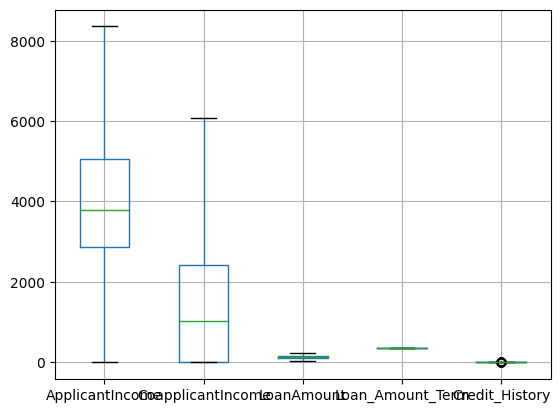

In [64]:
test_data.boxplot()

**Encoding**

In [65]:
train_data=pd.get_dummies(train_data,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [66]:
test_data=pd.get_dummies(test_data,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [67]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [68]:
# Split the dataset into features (x) and target (y)
x_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']


**Scaling**

In [69]:
# Scale the numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_xtrain=scaler.fit_transform(x_train) #scaling X
scaled_xtest=scaler.fit_transform(test_data)


In [70]:
sample_submission=pd.read_csv('/content/sample_submission_49d68Cx.csv')
sample_submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


**SVC model**

In [77]:
from sklearn.svm import SVC           # svc- support vector classification
svc_clf=SVC()
svc_clf.fit(scaled_xtrain,y_train)

SVC()

In [82]:
y_pred=svc_clf.predict(scaled_xtest)

In [83]:
sample_submission['Loan_Status']=y_pred
submission_SV=sample_submission
print(submission_SV)
submission_SV.to_csv('svc-rbf.csv',index=False)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]
